In [0]:
#import libraries
import io
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.util.testing as tm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read bike sharing dataset
from google.colab import files
uploaded = files.upload()

Saving bike.csv to bike.csv


In [0]:
bike_df = pd.read_csv(io.BytesIO(uploaded['bike.csv']))

In [15]:
bike_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [16]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [0]:
# getting rid of unneccessary columns
unneccessary_cols = ['dteday','casual','registered','instant']
bike_df.drop(labels=unneccessary_cols,axis=1,inplace=True)

In [18]:
bike_df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [0]:
# splitting data
from sklearn.model_selection import train_test_split
X = bike_df.drop('cnt',axis=1).values
y = bike_df['cnt'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [0]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# create neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [32]:
model.fit(X_train,y_train,epochs=250,verbose=1)

Epoch 1/250
381/381 [==============================] - 1s 2ms/step - loss: 68210.6797
Epoch 2/250
381/381 [==============================] - 1s 2ms/step - loss: 65674.0078
Epoch 3/250
381/381 [==============================] - 1s 2ms/step - loss: 57844.2930
Epoch 4/250
381/381 [==============================] - 1s 2ms/step - loss: 43186.4258
Epoch 5/250
381/381 [==============================] - 1s 2ms/step - loss: 30432.1836
Epoch 6/250
381/381 [==============================] - 1s 2ms/step - loss: 28093.2344
Epoch 7/250
381/381 [==============================] - 1s 2ms/step - loss: 27205.3359
Epoch 8/250
381/381 [==============================] - 1s 2ms/step - loss: 25908.7305
Epoch 9/250
381/381 [==============================] - 1s 2ms/step - loss: 24595.2910
Epoch 10/250
381/381 [==============================] - 1s 2ms/step - loss: 23223.8184
Epoch 11/250
381/381 [==============================] - 1s 2ms/step - loss: 22053.2754
Epoch 12/250
381/381 [==============================

In [0]:
riders_predictions = model.predict(X_test)

In [45]:
riders_predictions

array([[458.67084 ],
       [464.2552  ],
       [411.05884 ],
       ...,
       [166.64534 ],
       [118.365654],
       [350.8181  ]], dtype=float32)

In [0]:
results_df = pd.DataFrame(data={'Actual':y_test,'Predicted':riders_predictions[:,0]})

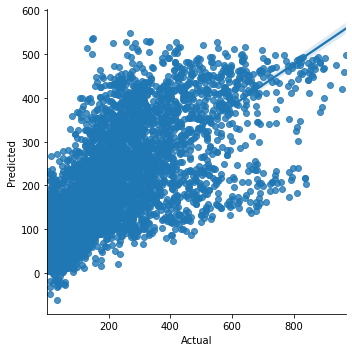

In [64]:
sns.lmplot(x='Actual',y='Predicted',data=results_df)